In [1]:
import pandas as pd
from torch import nn
import torch
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
df = pd.read_csv('~/Desktop/task/data.csv')

In [2]:
print(f'datapoint count by MHC sequence length:\n{df["MHC_sequence"].apply(len).value_counts()}')
print('\nRemoved MHCs: (sequences with length less than 300)')
print(' '.join(df['MHC_type'][df['MHC_sequence'].apply(len) < 300].unique()))

datapoint count by MHC sequence length:
362    910240
365    572396
366    281494
181     21051
273      3690
372      2154
363      2040
Name: MHC_sequence, dtype: int64

Removed MHCs: (sequences with length less than 300)
HLA-B*45:06 HLA-B*27:07 HLA-B*27:04 HLA-B*15:11 HLA-A*02:50 HLA-A*24:06


In [3]:
from model_pan import PanModel, encode_mhc, encode_peptide
model = PanModel()
model.load_state_dict(torch.load('./model-981.pt', map_location=torch.device(DEVICE))['model_state_dict'])
model.eval()
print('model loaded')

model loaded


In [4]:
results_single = pd.read_csv('./output-single.csv')
results_mid = pd.read_csv('./output-mid.csv')
results = pd.read_csv('./output-981.csv')
stypes = results_single['type'].unique()

In [5]:
from IPython.display import display
print('Single MHC model (trained on HLA-B*27:05) scores:')
display(results_single)
print('PAN model scores for same MHC types:')
display(results[results['mhc_type'].isin(stypes)].iloc[:, 1:])

Single MHC model (trained on HLA-B*27:05) scores:


,type,similarity,val_loss,accuracy,auroc,percision,recall,f1,count
0,HLA-B*27:05,1.000,2.433,0.906,0.928,0.844,0.654,0.737,182731
1,HLA-B*27:09,0.997,0.229,0.934,0.960,0.851,0.811,0.831,22180
2,HLA-B*27:03,0.997,0.027,0.967,0.991,0.890,0.954,0.921,3955
3,HLA-B*27:02,0.992,0.117,0.946,0.969,0.868,0.861,0.865,12749
4,HLA-B*27:08,0.992,0.075,0.948,0.972,0.856,0.890,0.873,8240


PAN model scores for same MHC types:


,mhc_type,accuracy,precision,recall,f1,positive,count,auroc
0,HLA-B*27:05,0.899059,0.841868,0.611944,0.708725,7334,36546,0.911652
15,HLA-B*27:09,0.947024,0.922380,0.802928,0.858519,888,4436,0.976137
27,HLA-B*27:03,0.973451,0.891429,0.987342,0.936937,158,791,0.996650
46,HLA-B*27:08,0.977549,0.942598,0.945455,0.944024,330,1648,0.993190
70,HLA-B*27:02,0.985098,0.959144,0.966667,0.962891,510,2550,0.994608


f1-score by MHC quantiles:
0.25    0.864915
0.50    0.898810
0.75    0.931096
Name: f1, dtype: float64

f1-score by MHC histogram:


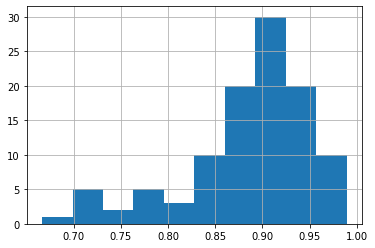

In [6]:
print(f'f1-score by MHC quantiles:\n{results["f1"].quantile([.25, .5, .75])}')
print(f'\nf1-score by MHC histogram:')
results['f1'].hist();

In [7]:
print('least f1-scores by MHC:')
results.sort_values(by=['f1']).iloc[:13, 1:].reset_index()

least f1-scores by MHC:


,index,mhc_type,accuracy,precision,recall,f1,positive,count,auroc
0,60,HLA-A*26:03,0.893939,0.875000,0.538462,0.666667,13,66,0.956459
1,99,HLA-B*15:03,0.880734,0.696970,0.707692,0.702290,65,327,0.948679
2,0,HLA-B*27:05,0.899059,0.841868,0.611944,0.708725,7334,36546,0.911652
3,84,HLA-B*15:17,0.895674,0.796875,0.645570,0.713287,79,393,0.965573
4,93,HLA-A*66:01,0.905405,0.900000,0.600000,0.720000,15,74,0.931073
5,104,HLA-A*68:23,0.906250,0.888889,0.615385,0.727273,13,64,0.962293
6,8,HLA-B*15:42,0.904594,0.826087,0.666667,0.737864,57,283,0.969725
7,61,HLA-A*30:01,0.905483,0.785156,0.725632,0.754221,277,1386,0.932303
8,87,HLA-A*30:02,0.910059,0.781818,0.763314,0.772455,169,845,0.938395
9,96,HLA-A*02:11,0.917683,0.842105,0.727273,0.780488,66,328,0.965475


f1-score by MHC quantiles:
0.25    0.738333
0.50    0.803509
0.75    0.835988
Name: f1, dtype: float64

f1-score by MHC histogram:
least f1-scores by MHC:


,mhc_type,accuracy,precision,recall,f1,positive,count,auroc
0,HLA-A*30:01,0.842713,0.810526,0.277978,0.413978,277,1386,0.892227
1,HLA-B*15:03,0.865443,0.800000,0.430769,0.560000,65,327,0.903641
2,HLA-A*66:01,0.891892,1.000000,0.466667,0.636364,15,74,0.936723
3,HLA-B*48:01,0.882979,0.722222,0.684211,0.702703,19,94,0.968421
4,HLA-B*27:05,0.894270,0.800381,0.630352,0.705263,7334,36546,0.905427
5,HLA-B*83:01,0.902344,0.882353,0.588235,0.705882,51,256,0.949689
6,HLA-B*15:17,0.900763,0.844828,0.620253,0.715328,79,393,0.956583
7,HLA-A*26:03,0.909091,0.888889,0.615385,0.727273,13,66,0.956459
8,HLA-C*01:02,0.902655,0.816720,0.661458,0.730935,384,1921,0.954601
9,HLA-B*15:09,0.902439,0.785714,0.687500,0.733333,16,82,0.955492


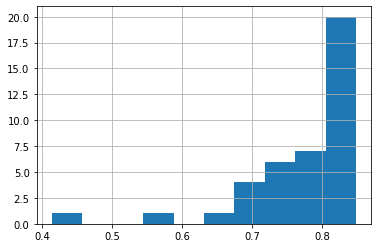

In [8]:
print(f'f1-score by MHC quantiles:\n{results_mid["f1"].quantile([.25, .5, .75])}')
print(f'\nf1-score by MHC histogram:')
results_mid['f1'].hist();
print('least f1-scores by MHC:')
results_mid.sort_values(by=['f1']).iloc[:18, 1:]